<a href="https://colab.research.google.com/github/nisharathod231/Sustainable-Agriculture-Practices-Recommender/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras.losses import binary_crossentropy

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Crop_recommendation_kaggle.csv")
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
print(data.columns)

print(data.info())
print(data.describe())

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.0000

In [4]:
print(data['label'].nunique())

22


In [5]:
label_counts = data['label'].value_counts()

# Print the results
print(label_counts)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [6]:
def calculate_stats(df, group_column, numerical_columns):
    result = df.groupby(group_column)[numerical_columns].agg(['min', 'max', 'mean'])
    result.columns = ['_'.join(col).strip() for col in result.columns.values]
    return result

numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
new_data = calculate_stats(data, 'label', numerical_columns)

In [7]:
new_data = new_data.reset_index()

In [8]:
print(new_data)

          label  N_min  N_max  N_mean  P_min  P_max  P_mean  K_min  K_max  \
0         apple      0     40   20.80    120    145  134.22    195    205   
1        banana     80    120  100.23     70     95   82.01     45     55   
2     blackgram     20     60   40.02     55     80   67.47     15     25   
3      chickpea     20     60   40.09     55     80   67.79     75     85   
4       coconut      0     40   21.98      5     30   16.93     25     35   
5        coffee     80    120  101.20     15     40   28.74     25     35   
6        cotton    100    140  117.77     35     60   46.24     15     25   
7        grapes      0     40   23.18    120    145  132.53    195    205   
8          jute     60    100   78.40     35     60   46.86     35     45   
9   kidneybeans      0     40   20.75     55     80   67.54     15     25   
10       lentil      0     40   18.77     55     80   68.36     15     25   
11        maize     60    100   77.76     35     60   48.44     15     25   

In [9]:
new_data.to_csv('new_crop_data.csv', index=False)

In [10]:
print(new_data.columns)

Index(['label', 'N_min', 'N_max', 'N_mean', 'P_min', 'P_max', 'P_mean',
       'K_min', 'K_max', 'K_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'humidity_min', 'humidity_max', 'humidity_mean',
       'ph_min', 'ph_max', 'ph_mean', 'rainfall_min', 'rainfall_max',
       'rainfall_mean'],
      dtype='object')


In [11]:
print(new_data['label'])


0           apple
1          banana
2       blackgram
3        chickpea
4         coconut
5          coffee
6          cotton
7          grapes
8            jute
9     kidneybeans
10         lentil
11          maize
12          mango
13      mothbeans
14       mungbean
15      muskmelon
16         orange
17         papaya
18     pigeonpeas
19    pomegranate
20           rice
21     watermelon
Name: label, dtype: object


In [12]:
all_crops = [
    "apple", "banana", "blackgram", "chickpea", "coconut", "coffee", "cotton",
    "grapes", "jute", "kidneybeans", "lentil", "maize", "mango", "mothbeans",
    "mungbean", "muskmelon", "orange", "papaya", "pigeonpeas", "pomegranate",
    "rice", "watermelon"
]

exclude_crops = [
    "Rice", "Wheat", "Maize (Corn)", "Cotton", "Sugarcane", "Tur (Arhar)", "Urad",
    "Moong", "Gram (Bengal Gram)", "Masoor", "Groundnut", "Mustard (Rai)", "Sunflower",
    "Soybean", "Tobacco", "Potato", "Onion", "Tomato", "Chillies", "Tea", "Coffee",
    "Rubber", "Jute", "Coconut", "Mango", "Banana", "Guava", "Orange", "Lemon",
    "Mosambi", "Kinnow (Mandarin orange)", "Grapes", "Pomegranate", "Ber", "Papaya",
    "Litchi", "Apple", "Apricot", "Peach", "Plum", "Pear", "Walnut", "Almond",
    "Methi (Fenugreek)", "Isabgol", "Coriander", "Curry Leaf", "Mint", "Spinach",
    "Cauliflower", "Cabbage", "Okra (Ladyfinger)", "Brinjal (Eggplant)", "Bottle Gourd",
    "Bitter Gourd", "Snake Gourd", "Pumpkin", "Ash Gourd", "Toria"
]

filtered_crops = [crop for crop in exclude_crops if crop.lower() not in (item.lower() for item in all_crops)]




In [13]:
for i, crop in enumerate(filtered_crops):
    print(f"{i} {crop}")

0 Wheat
1 Maize (Corn)
2 Sugarcane
3 Tur (Arhar)
4 Urad
5 Moong
6 Gram (Bengal Gram)
7 Masoor
8 Groundnut
9 Mustard (Rai)
10 Sunflower
11 Soybean
12 Tobacco
13 Potato
14 Onion
15 Tomato
16 Chillies
17 Tea
18 Rubber
19 Guava
20 Lemon
21 Mosambi
22 Kinnow (Mandarin orange)
23 Ber
24 Litchi
25 Apricot
26 Peach
27 Plum
28 Pear
29 Walnut
30 Almond
31 Methi (Fenugreek)
32 Isabgol
33 Coriander
34 Curry Leaf
35 Mint
36 Spinach
37 Cauliflower
38 Cabbage
39 Okra (Ladyfinger)
40 Brinjal (Eggplant)
41 Bottle Gourd
42 Bitter Gourd
43 Snake Gourd
44 Pumpkin
45 Ash Gourd
46 Toria


# Finding Correlation Matrix

In [14]:
data = pd.read_csv("new_crop_data.csv")

In [15]:
numerical_columns = ['N_min', 'N_max', 'N_mean', 'P_min', 'P_max', 'P_mean',
       'K_min', 'K_max', 'K_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'humidity_min', 'humidity_max', 'humidity_mean',
       'ph_min', 'ph_max', 'ph_mean', 'rainfall_min', 'rainfall_max',
       'rainfall_mean']

In [16]:
data_numerical = data[numerical_columns]

In [17]:
correlation_matrix = data_numerical.corr()

In [18]:
print(correlation_matrix)

                     N_min     N_max    N_mean     P_min     P_max    P_mean  \
N_min             1.000000  0.999968  0.999428 -0.253162 -0.253236 -0.256811   
N_max             0.999968  1.000000  0.999428 -0.253410 -0.253448 -0.257077   
N_mean            0.999428  0.999428  1.000000 -0.244635 -0.244660 -0.248356   
P_min            -0.253162 -0.253410 -0.244635  1.000000  0.999979  0.999759   
P_max            -0.253236 -0.253448 -0.244660  0.999979  1.000000  0.999721   
P_mean           -0.256811 -0.257077 -0.248356  0.999759  0.999721  1.000000   
K_min            -0.161819 -0.161828 -0.147945  0.757083  0.757194  0.759506   
K_max            -0.161819 -0.161828 -0.147945  0.757083  0.757194  0.759506   
K_mean           -0.162619 -0.162628 -0.148673  0.755330  0.755438  0.757753   
temperature_min   0.342002  0.342045  0.343982 -0.350294 -0.350972 -0.349608   
temperature_max  -0.283059 -0.285649 -0.276780  0.150849  0.147481  0.146299   
temperature_mean  0.024693  0.022496  0.

<Axes: >

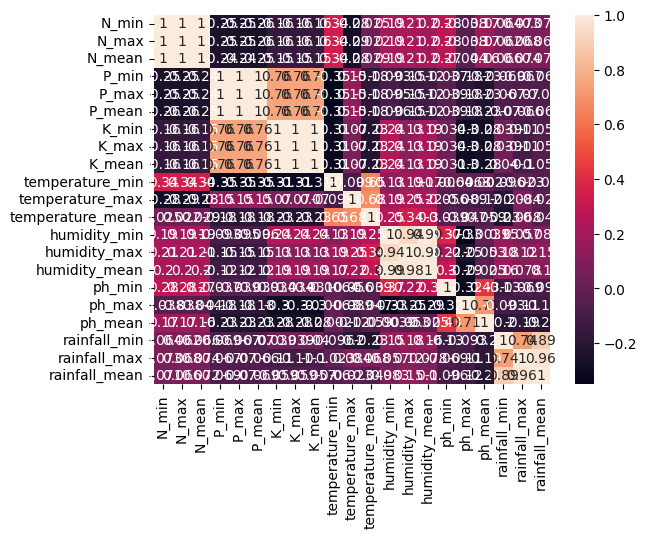

In [19]:
sns.heatmap(correlation_matrix, annot=True)

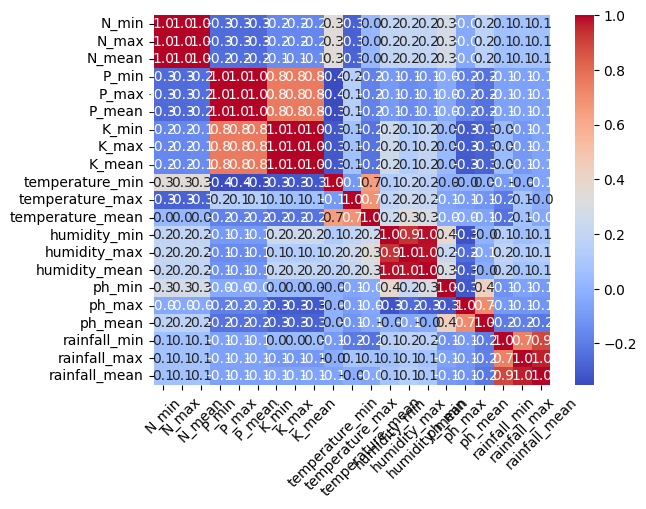

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# plt.colorbar()
plt.show()

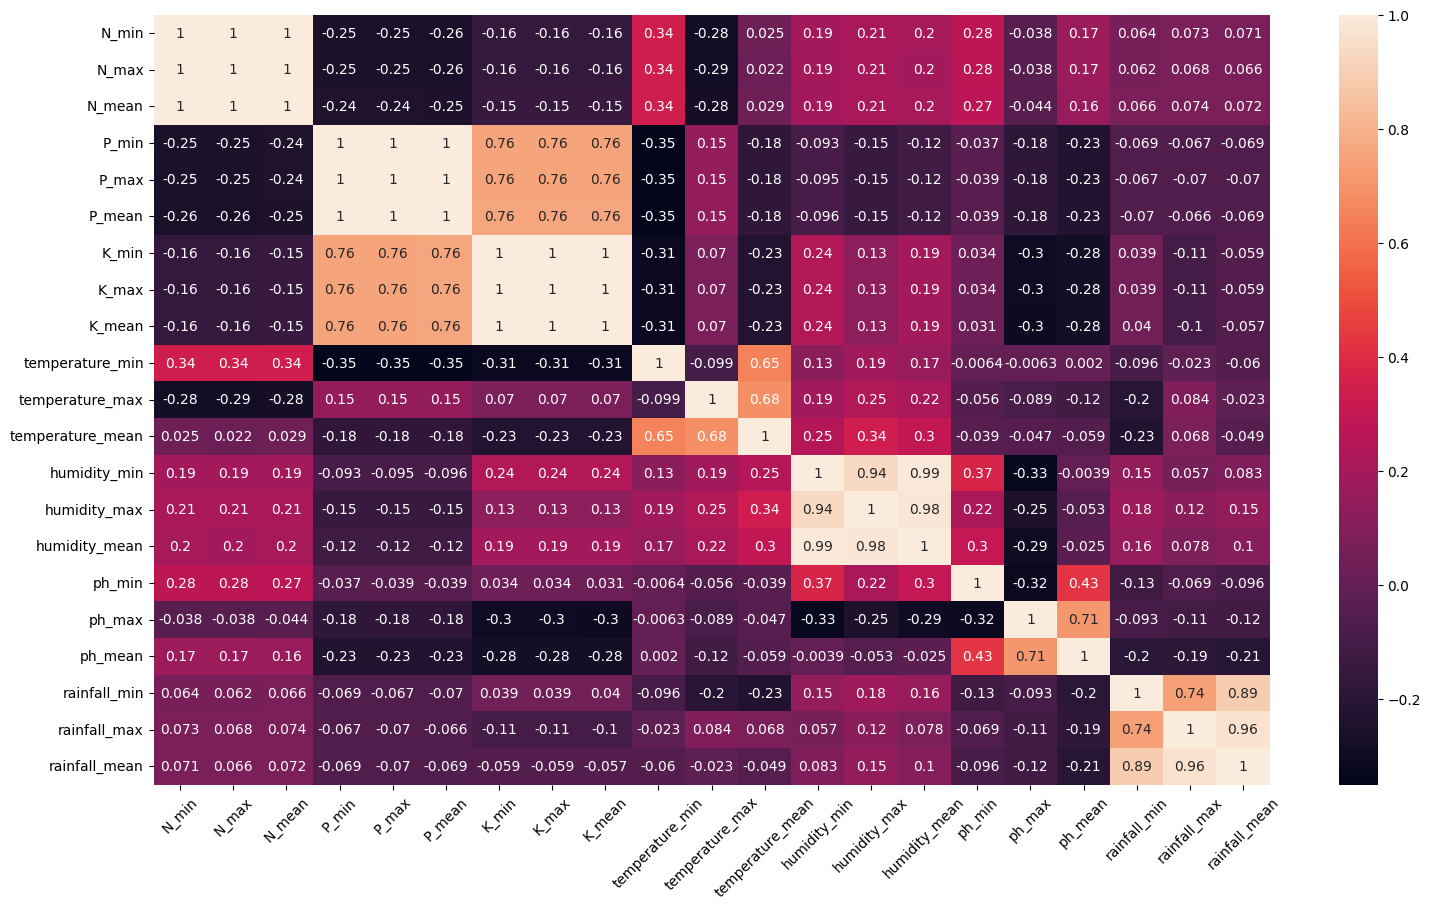

In [21]:
plt.figure(figsize=(18, 10))

sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [22]:
threshold = 0.8

highly_correlated_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = abs(correlation_matrix[col1][col2])
            if correlation >= threshold:
                highly_correlated_pairs.append((col1, col2, correlation))

print(highly_correlated_pairs)

[('N_min', 'N_max', 0.9999676937827798), ('N_min', 'N_mean', 0.9994284765340233), ('N_max', 'N_min', 0.9999676937827798), ('N_max', 'N_mean', 0.9994278915275994), ('N_mean', 'N_min', 0.9994284765340233), ('N_mean', 'N_max', 0.9994278915275994), ('P_min', 'P_max', 0.9999786871734007), ('P_min', 'P_mean', 0.9997587295153214), ('P_max', 'P_min', 0.9999786871734007), ('P_max', 'P_mean', 0.9997205479000963), ('P_mean', 'P_min', 0.9997587295153214), ('P_mean', 'P_max', 0.9997205479000963), ('K_min', 'K_max', 1.0), ('K_min', 'K_mean', 0.9999841119582541), ('K_max', 'K_min', 1.0), ('K_max', 'K_mean', 0.9999841119582541), ('K_mean', 'K_min', 0.9999841119582541), ('K_mean', 'K_max', 0.9999841119582541), ('humidity_min', 'humidity_max', 0.9365293082539284), ('humidity_min', 'humidity_mean', 0.9876293205521771), ('humidity_max', 'humidity_min', 0.9365293082539284), ('humidity_max', 'humidity_mean', 0.9794368180149141), ('humidity_mean', 'humidity_min', 0.9876293205521771), ('humidity_mean', 'humid

In [23]:
highly_correlated_matrix = correlation_matrix.abs() >= threshold

highly_correlated_pairs = highly_correlated_matrix.unstack()
highly_correlated_pairs = highly_correlated_pairs.loc[highly_correlated_pairs].index.tolist()

print(highly_correlated_pairs)

[('N_min', 'N_min'), ('N_min', 'N_max'), ('N_min', 'N_mean'), ('N_max', 'N_min'), ('N_max', 'N_max'), ('N_max', 'N_mean'), ('N_mean', 'N_min'), ('N_mean', 'N_max'), ('N_mean', 'N_mean'), ('P_min', 'P_min'), ('P_min', 'P_max'), ('P_min', 'P_mean'), ('P_max', 'P_min'), ('P_max', 'P_max'), ('P_max', 'P_mean'), ('P_mean', 'P_min'), ('P_mean', 'P_max'), ('P_mean', 'P_mean'), ('K_min', 'K_min'), ('K_min', 'K_max'), ('K_min', 'K_mean'), ('K_max', 'K_min'), ('K_max', 'K_max'), ('K_max', 'K_mean'), ('K_mean', 'K_min'), ('K_mean', 'K_max'), ('K_mean', 'K_mean'), ('temperature_min', 'temperature_min'), ('temperature_max', 'temperature_max'), ('temperature_mean', 'temperature_mean'), ('humidity_min', 'humidity_min'), ('humidity_min', 'humidity_max'), ('humidity_min', 'humidity_mean'), ('humidity_max', 'humidity_min'), ('humidity_max', 'humidity_max'), ('humidity_max', 'humidity_mean'), ('humidity_mean', 'humidity_min'), ('humidity_mean', 'humidity_max'), ('humidity_mean', 'humidity_mean'), ('ph_mi

In [24]:
data_old = pd.read_csv("/content/drive/MyDrive/Crop_recommendation_kaggle.csv")

In [25]:
numerical_columns_old = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data_numerical_old = data_old[numerical_columns_old]

In [26]:
correlation_matrix_old = data_numerical_old.corr()

In [27]:
print(correlation_matrix_old)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


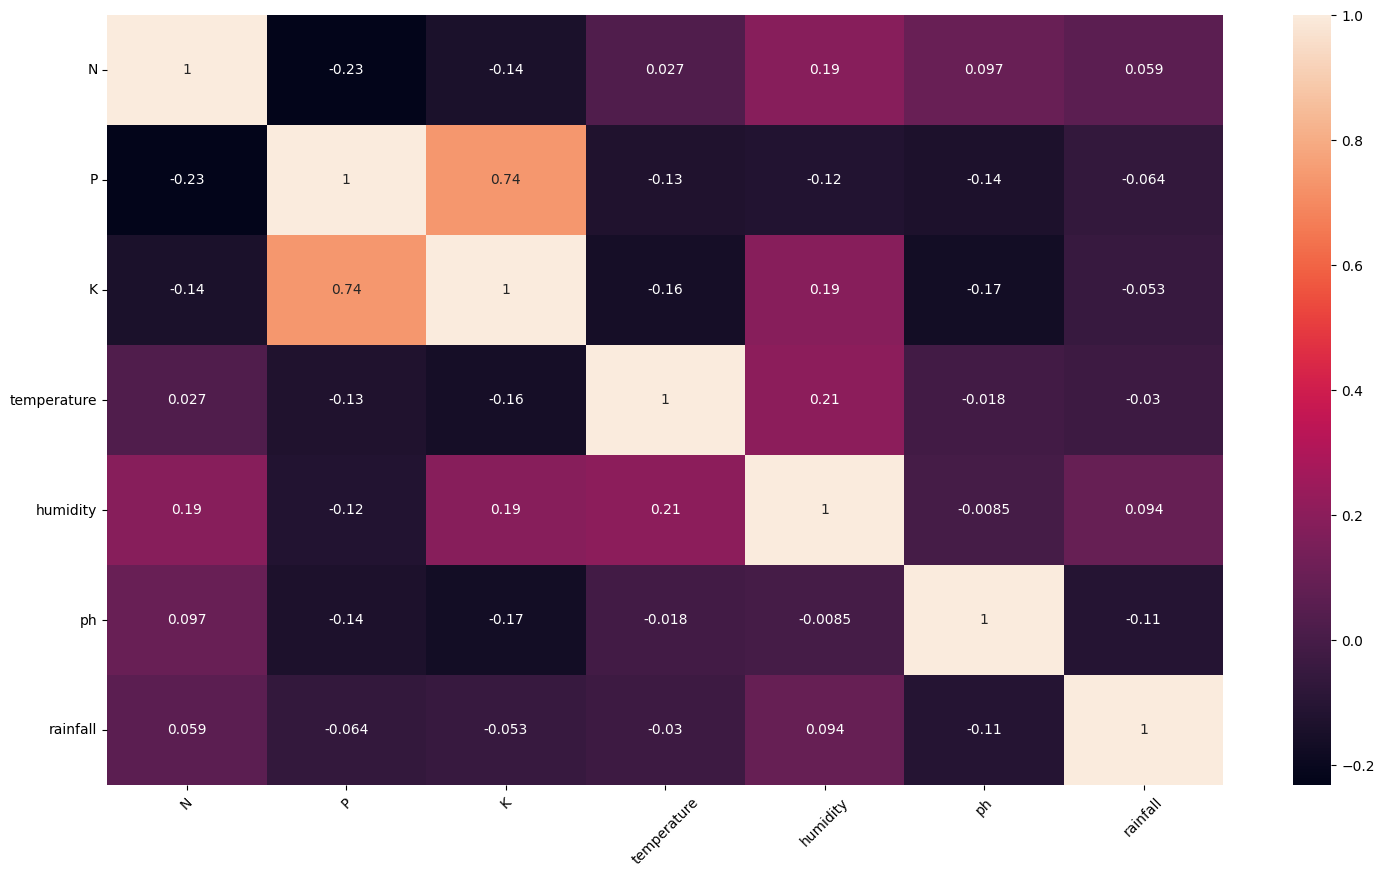

In [28]:
plt.figure(figsize=(18, 10))

sns.heatmap(correlation_matrix_old, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [29]:
threshold = 0.7

highly_correlated_pairs = []
for col1 in correlation_matrix_old.columns:
    for col2 in correlation_matrix_old.columns:
        if col1 != col2:
            correlation = abs(correlation_matrix_old[col1][col2])
            if correlation >= threshold:
                highly_correlated_pairs.append((col1, col2, correlation))

print(highly_correlated_pairs)

[('P', 'K', 0.736232217244661), ('K', 'P', 0.736232217244661)]


# I will try dropping some

In [30]:
mean_columns = [col for col in new_data.columns if col.endswith('_mean')]
columns_to_keep = ['label'] + mean_columns
print (columns_to_keep)

['label', 'N_mean', 'P_mean', 'K_mean', 'temperature_mean', 'humidity_mean', 'ph_mean', 'rainfall_mean']


In [31]:
new_data = new_data[columns_to_keep]

In [32]:
print(new_data)

          label  N_mean  P_mean  K_mean  temperature_mean  humidity_mean  \
0         apple   20.80  134.22  199.89         22.630942      92.333383   
1        banana  100.23   82.01   50.05         27.376798      80.358123   
2     blackgram   40.02   67.47   19.24         29.973340      65.118426   
3      chickpea   40.09   67.79   79.92         18.872847      16.860439   
4       coconut   21.98   16.93   30.59         27.409892      94.844272   
5        coffee  101.20   28.74   29.94         25.540477      58.869846   
6        cotton  117.77   46.24   19.56         23.988958      79.843474   
7        grapes   23.18  132.53  200.11         23.849575      81.875228   
8          jute   78.40   46.86   39.99         24.958376      79.639864   
9   kidneybeans   20.75   67.54   20.05         20.115085      21.605357   
10       lentil   18.77   68.36   19.41         24.509052      64.804785   
11        maize   77.76   48.44   19.79         22.389204      65.092249   
12        ma

In [33]:
new_data.to_csv('mean_crop_data.csv', index=False)

# Normalizing

In [34]:
print(new_data.columns)

print(new_data.info())
print(new_data.describe())

Index(['label', 'N_mean', 'P_mean', 'K_mean', 'temperature_mean',
       'humidity_mean', 'ph_mean', 'rainfall_mean'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             22 non-null     object 
 1   N_mean            22 non-null     float64
 2   P_mean            22 non-null     float64
 3   K_mean            22 non-null     float64
 4   temperature_mean  22 non-null     float64
 5   humidity_mean     22 non-null     float64
 6   ph_mean           22 non-null     float64
 7   rainfall_mean     22 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.5+ KB
None
           N_mean      P_mean      K_mean  temperature_mean  humidity_mean  \
count   22.000000   22.000000   22.000000         22.000000      22.000000   
mean    50.551818   53.362727   48.149091         25.616244      71.481779

Decided to use Standardization (Z-score normalization) over min-max scaler

In [35]:
numerical_cols = ['N_mean', 'P_mean', 'K_mean', 'temperature_mean', 'humidity_mean', 'ph_mean', 'rainfall_mean']
data_numerical = new_data[numerical_cols]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

new_data[numerical_cols] = data_scaled

<ipython-input-35-53f336689dd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[numerical_cols] = data_scaled


In [36]:
print(new_data)

          label    N_mean    P_mean    K_mean  temperature_mean  \
0         apple -0.851386  2.518351  3.002375         -0.837041   
1        banana  1.421604  0.892237  0.037612          0.493637   
2     blackgram -0.301381  0.439380 -0.572001          1.221674   
3      chickpea -0.299378  0.449347  0.628625         -1.890763   
4       coconut -0.817619 -1.134720 -0.347428          0.502916   
5        coffee  1.449362 -0.766890 -0.360289         -0.021244   
6        cotton  1.923533 -0.221842 -0.565669         -0.456270   
7        grapes -0.783279  2.465715  3.006728         -0.495351   
8          jute  0.796911 -0.202532 -0.161437         -0.184458   
9   kidneybeans -0.852817  0.441560 -0.555974         -1.542455   
10       lentil -0.909477  0.467100 -0.568637         -0.310442   
11        maize  0.778597 -0.153321 -0.561118         -0.904821   
12        mango -0.872276 -0.815478 -0.360684          1.568073   
13    mothbeans -0.833072 -0.166714 -0.552413          0.72302

In [37]:
print(new_data.columns)

print(new_data.info())
print(new_data.describe())

Index(['label', 'N_mean', 'P_mean', 'K_mean', 'temperature_mean',
       'humidity_mean', 'ph_mean', 'rainfall_mean'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             22 non-null     object 
 1   N_mean            22 non-null     float64
 2   P_mean            22 non-null     float64
 3   K_mean            22 non-null     float64
 4   temperature_mean  22 non-null     float64
 5   humidity_mean     22 non-null     float64
 6   ph_mean           22 non-null     float64
 7   rainfall_mean     22 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.5+ KB
None
             N_mean        P_mean        K_mean  temperature_mean  \
count  2.200000e+01  2.200000e+01  2.200000e+01      2.200000e+01   
mean  -3.027881e-17  3.734387e-16  1.103915e-17      5.052382e-16   
std    1.023533e+00  1.

# OHE

In [38]:
numerical_cols = ['N_mean', 'P_mean', 'K_mean', 'temperature_mean', 'humidity_mean', 'ph_mean', 'rainfall_mean']
categorical_cols = ['label']
encoder = OneHotEncoder(sparse=False)
encoded_labels = encoder.fit_transform(new_data[categorical_cols])
new_data = pd.concat([new_data[numerical_cols], pd.DataFrame(encoded_labels)], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
print(new_data)

      N_mean    P_mean    K_mean  temperature_mean  humidity_mean   ph_mean  \
0  -0.851386  2.518351  3.002375         -0.837041       0.952306 -1.150327   
1   1.421604  0.892237  0.037612          0.493637       0.405388 -1.034765   
2  -0.301381  0.439380 -0.572001          1.221674      -0.290618  1.415960   
3  -0.299378  0.449347  0.628625         -1.890763      -2.494590  1.848555   
4  -0.817619 -1.134720 -0.347428          0.502916       1.066979 -1.050387   
5   1.449362 -0.766890 -0.360289         -0.021244      -0.575995  0.683671   
6   1.923533 -0.221842 -0.565669         -0.456270       0.381884  0.944430   
7  -0.783279  2.465715  3.006728         -0.495351       0.474675 -0.945172   
8   0.796911 -0.202532 -0.161437         -0.184458       0.372585  0.561076   
9  -0.852817  0.441560 -0.555974         -1.542455      -2.277887 -1.534437   
10 -0.909477  0.467100 -0.568637         -0.310442      -0.304942  0.976940   
11  0.778597 -0.153321 -0.561118         -0.904821  

input_dim = new_data.shape[1]

latent_dim = 10

batch_size = 128

epochs = 50

Epoch 50/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5460

In [63]:
input_dim = new_data.shape[1]
latent_dim = 10
batch_size = 256
epochs = 100


In [64]:
# Encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(50, activation='relu')(inputs)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)

In [65]:
#Re parameterization
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

In [66]:
# Decoder
decoded = Dense(50, activation='relu')(z)
outputs = Dense(input_dim, activation='sigmoid')(decoded)

In [67]:
vae = Model(inputs, outputs)

In [68]:
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 29)]                 0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 50)                   1500      ['input_5[0][0]']             
                                                                                                  
 dense_18 (Dense)            (None, 10)                   510       ['dense_17[0][0]']            
                                                                                                  
 dense_19 (Dense)            (None, 10)                   510       ['dense_17[0][0]']            
                                                                                            

In [69]:
reconstruction_loss = binary_crossentropy(inputs, outputs)
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

In [70]:
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [71]:
vae.fit(new_data, new_data, epochs=epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.9281
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 1.8671
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.8283
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.7559
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 1.6970
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.6591
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 1.5686
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 1.5165
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1.4737
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.4232
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 1.3951
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 1.3383
Epoch 13/100
1/1 [==============================] - 